In [1]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

from data_loaders import Plain_Dataset, eval_data_dataloader
from deep_emotion import Deep_Emotion

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            loss = criterion(outputs,labels)
            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")


epochs = 20
lr = 0.005
batchsize = 128

    #if args.train:
net = Deep_Emotion()  ##  Creating a model by calling deep_emotion.py
net.to(device)  ##MOVING IT TO GPU
data = "/Users/harshartwani/Documents/UTA/2nd_Sem/ML/Final_Project/HER_Deep_Learning/data"
print("Model archticture: ", net)
traincsv_file = data+'/'+'train.csv'
validationcsv_file = data+'/'+'val.csv'
train_img_dir = data+'/'+'train/'
validation_img_dir = data+'/'+'val/'

transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= lr)
Train(epochs, train_loader, val_loader, criterion, optmizer, device)


Model archticture:  Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=7, bias=True)
  (localization): Sequential(
    (0): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


/Users/harshartwani/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3448: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/Users/harshartwani/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


Epoch: 1 	Training Loss: 0.01267749 	Validation Loss 0.01320171 	Training Acuuarcy 35.559% 	Validation Acuuarcy 37.169%
Epoch: 2 	Training Loss: 0.01149157 	Validation Loss 0.01180169 	Training Acuuarcy 43.111% 	Validation Acuuarcy 43.661%
Epoch: 3 	Training Loss: 0.01113228 	Validation Loss 0.01171316 	Training Acuuarcy 45.080% 	Validation Acuuarcy 43.856%
Epoch: 4 	Training Loss: 0.01092205 	Validation Loss 0.01179312 	Training Acuuarcy 46.210% 	Validation Acuuarcy 44.664%
Epoch: 5 	Training Loss: 0.01075262 	Validation Loss 0.01148652 	Training Acuuarcy 47.244% 	Validation Acuuarcy 44.636%
Epoch: 6 	Training Loss: 0.01065798 	Validation Loss 0.01140307 	Training Acuuarcy 47.758% 	Validation Acuuarcy 45.222%
Epoch: 7 	Training Loss: 0.01061601 	Validation Loss 0.01130919 	Training Acuuarcy 47.731% 	Validation Acuuarcy 45.890%
Epoch: 8 	Training Loss: 0.01052347 	Validation Loss 0.01121600 	Training Acuuarcy 48.062% 	Validation Acuuarcy 46.336%
Epoch: 9 	Training Loss: 0.01045728 	Val

In [27]:
import cv2
import matplotlib.pyplot as plt
frame = cv2.imread('/Users/harshartwani/Downloads/mail.jpeg')

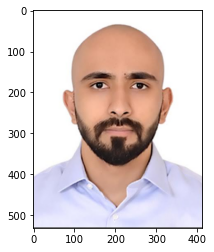

In [28]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [29]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [30]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB )

In [31]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y: y+h, x:x+w]
    roi_color = frame[y: y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not Detected!")
    else: 
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]
    

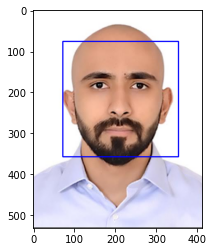

In [32]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

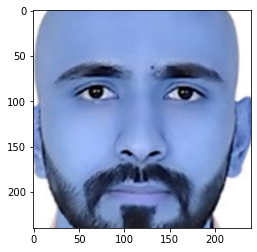

In [33]:
plt.imshow(face_roi)

In [34]:
face_roi.shape

(240, 240, 3)

In [35]:
import numpy as np
gray = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
final_image = cv2.resize(gray, (48,48))
final_image = np.expand_dims(final_image, axis = 0)#adding third dimension
final_image = np.expand_dims(final_image, axis = 0)#adding fourth dimension
final_image = final_image/255.0  ##Normalization


In [36]:

dataa = torch.from_numpy(final_image)
dataa = dataa.type(torch.FloatTensor)  #numpy to tensor
dataa = dataa.to(device)
outputs = net(dataa)
Pred = F.softmax(outputs, dim=1)
Predictions = torch.argmax(Pred)

In [37]:
final_image.shape

(1, 1, 48, 48)

In [38]:
print(Predictions)

tensor(6)


In [39]:
print(torch.argmax(Predictions))

tensor(0)


In [40]:
index_pred = torch.argmax(Predictions)

In [41]:
####UI code

In [42]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)

img = np.zeros((500,500))

text = "Some text in a box"

(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in faces:
        roi_gray = gray[y: y+h, x:x+w]
        roi_color = frame[y: y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not Detected!")
        else: 
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew] #CROPPING THE FACE
    gray = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
    final_image = cv2.resize(gray, (48,48))
    final_image = np.expand_dims(final_image, axis = 0)#adding third dimension
    final_image = np.expand_dims(final_image, axis = 0)#adding fourth dimension
    final_image = final_image/255.0  ##Normalization
    dataa = torch.from_numpy(final_image)
    dataa = dataa.type(torch.FloatTensor)  #numpy to tensor
    dataa = dataa.to(device)
    outputs = net(dataa)
    Pred = F.softmax(outputs, dim=1)
    Predictions = torch.argmax(Pred)
    print(Predictions)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if((Predictions) == 0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif((Predictions) == 1):
        status = "Disgust"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif((Predictions) == 2):
        status = "Fear"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif((Predictions) == 3):
        status = "Happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif((Predictions) == 4):
        status = "Sad"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif((Predictions) == 5):
        status = "Surprise"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif((Predictions) == 6):
        status = "Neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    cv2.imshow('Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()



tensor(2)
Face not Detected!
tensor(2)
tensor(6)
tensor(2)
tensor(6)
Face not Detected!
tensor(2)
tensor(2)
tensor(6)
tensor(2)
tensor(6)
tensor(6)
tensor(6)
tensor(2)
tensor(5)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
Face not Detected!
tensor(2)
tensor(6)
tensor(6)
tensor(6)
tensor(2)
tensor(6)
tensor(6)
tensor(2)
tensor(6)
tensor(5)
tensor(6)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
tensor(6)
tensor(6)
tensor(6)
tensor(6)
Face not Detected!
tensor(2)
Face not Detected!
tensor(2)
tensor(2)
tensor(2)
tensor(6)
Face not Detected!
tensor(6)
tensor(6)
tensor(0)
Face not Detected!
tensor(4)
tensor(0)
tensor(6)
tensor(0)
tensor(0)
tensor(6)
Face not Detected!
tensor(3)
tensor(6)
Face not Detected!
tensor(2)
Face not Detected!
tensor(2)
Face not Detected!
tensor(3)
Face not Detected!
Face not Detected!
tensor(3)
tensor(3)
Face not Detected!
tensor(3)
Face not Detected!
tensor(3)
Face not Detected!
tensor(3)
Face not Detected!
tensor(3)
tensor(4)
Face no

tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
tensor(4)
tensor(5)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
tensor(2)
tensor(6)
tensor(2)
tensor(5)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
tensor(6)
tensor(4)
tensor(6)
tensor(2)
tensor(2)
tensor(6)
tensor(4)
tensor(5)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
tensor(2)
Face not Detected!
tensor(5)
tensor(6)
tensor(2)
Face not Detected!
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
tensor(4)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
tensor(2)
tensor(5)
tensor(4)
tensor(6)
tensor(2)
tensor(6)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
tensor(2)
tensor(6)
tensor(2)
tensor(2)
tensor(2)
tensor(6)
Face not Detected!
tensor(2)
tensor(2)
tensor(2)
tensor(6)
Face not Detected!
tensor(6)
Face not Detec